<a href="https://colab.research.google.com/github/ghlee020202/Data-Analysis-with-Open-Source/blob/main/%EC%A4%91%EA%B0%84%EA%B3%BC%EC%A0%9C%EB%AC%BC_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 새 섹션

AttributeError: This method only works with the ScalarFormatter

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


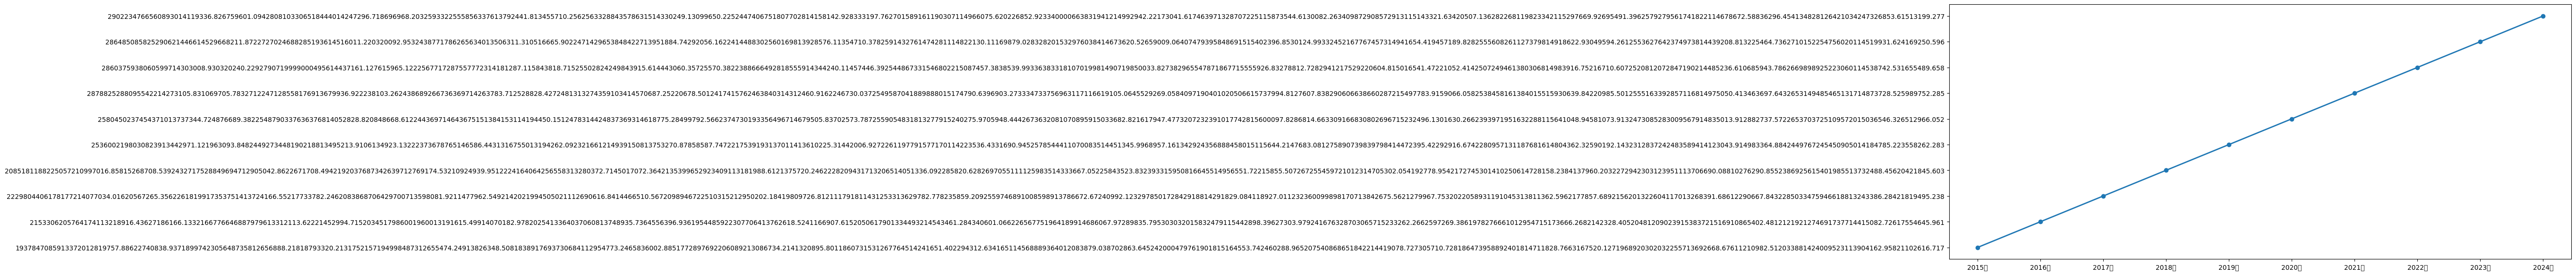

In [3]:
#문 3-1
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')

all_personal = []
for year in range(2015,2025) :
    for month in range(1,12+1) :
        url = f"http://openapi.seoul.go.kr:8088/5a6f4b514367686c3535756f41646d/json/energyUseDataSummaryInfo/1/10/{year}/{month:02d}"
        params = {
            'TYPE' : 'json',
            'START_INDEX' : '1',
            'END_INDEX' : '10'
        }
        #수집
        response = requests.get(url, params=params)
        if response.status_code == 200:
            data = response.json()['energyUseDataSummaryInfo']['row']
        else:
            print("API 호출 실패: {response.status_code}")

        #데이터프레임으로 변환
        df = pd.DataFrame(data)
        #컬럼 선택
        selected_cols = df[['YEAR', 'MON', 'MM_TYPE', 'EUS', 'GUS', 'WUS', 'HUS']]
        df = selected_cols
        #개인 유형 데이터 선택
        df_personal = df[df['MM_TYPE'] == '개인']
        all_personal.append(df_personal)

df_all_personal = pd.concat(all_personal, ignore_index=True)
df = df_all_personal
#정수형 변환
df['MON'] = df['MON'].astype(int)
df['YEAR'] = df['YEAR'].astype(int)
#계절 변환
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'
#계절과 연도 열 추가
df['season'] = df['MON'].apply(get_season)
df['year'] = df['YEAR'].apply(lambda x : f'{x}년')
df = df

#월별 총 에너지 사용량(전기+가스+수도+지역난방)
df['total_energy'] = df[['EUS', 'GUS', 'WUS', 'HUS']].sum(axis=1)

#연도별 총 에너지 사용량 (1월+ ... +12월)
df_yearly = df.groupby('year', as_index=False)['total_energy'].sum()

#선 그래프 그리기
# 연도-월 기준으로 정렬
df = df.sort_values(['year'])

# 그래프 크기 설정
plt.figure(figsize=(17, 7))

# 선 그래프 그리기
plt.plot(df_yearly['year'], df_yearly['total_energy'], marker='o', linestyle='-', linewidth=2)

#y축 값을 지수표기로 변경
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.gca().yaxis.get_offset_text().set_fontsize(12)

# 제목과 축 라벨
plt.title('연도별 에너지 사용 총액 변화 - 2481', fontsize=14)
plt.xlabel('년 (year)', fontsize=12)
plt.ylabel('총 에너지 사용량 (단위: 합계)', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.yticks(rotation=0, ha='right')

plt.show()

In [ ]:
#한글 처리를 위한 marplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cacha/matplotlib -rt

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and direc

In [9]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')

In [ ]:
#문 3-1
import pandas as pd
import requests
import json

df = pd.DataFrame(df)
df


plt.plot(x, y, marker ='o')
plt.title('선 그래프')

plt.show()

NameError: name 'df' is not defined